In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.shape

(20800, 5)

In [4]:
data.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
data.shape

(18285, 5)

<AxesSubplot:>

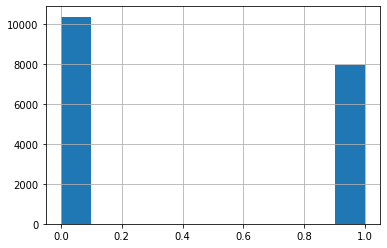

In [10]:
data['label'].hist()

In [11]:
x=data.drop(['label'],1)

In [12]:
y=data['label']

In [13]:
x.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [14]:
y.head(2)

0    1
1    0
Name: label, dtype: int64

In [15]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM , Dense , Bidirectional , Dropout
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score

In [17]:
vocabulary_size=6000

In [18]:
news=x.copy()

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
news.reset_index(inplace=True)

In [21]:
news.head(2)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [22]:
news['title']=news['title']+news['author']

# Cleaning text  
Removed urls, emojis and punctuations , stopwords
and Lower cased clean text

In [23]:
ps=PorterStemmer()

In [24]:
corpus=[]

In [25]:
news['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted ItDarrell Lucus'

In [26]:
re.sub('[^a-zA-Z]' , " ", news['title'][0])

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted ItDarrell Lucus'

In [27]:
re.sub('[^a-zA-Z]' , " ", news['title'][0]).lower()

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted itdarrell lucus'

In [28]:
words=re.sub('[^a-zA-Z]' , " ", news['title'][0]).lower().split()

In [29]:
words

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'itdarrell',
 'lucus']

In [30]:
[ps.stem(word) for word in words if not word in stopwords.words('english')]

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet',
 'itdarrel',
 'lucu']

In [31]:
for i in range(len(news)):
    title=re.sub('[^a-zA-Z]' , " ", news['title'][i]).lower().split()
    title= [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title=' '.join(title)
    corpus.append(title)

In [32]:
corpus[:4]

['hous dem aid even see comey letter jason chaffetz tweet itdarrel lucu',
 'flynn hillari clinton big woman campu breitbartdaniel j flynn',
 'truth might get firedconsortiumnew com',
 'civilian kill singl us airstrik identifiedjessica purkiss']

In [33]:
onehot_representation=[one_hot(words , vocabulary_size) for words in corpus] 

In [34]:
onehot_representation[:5]

[[5410, 265, 5297, 3009, 1872, 4955, 1164, 4344, 2184, 5367, 3160, 430],
 [4383, 5843, 5385, 2390, 1539, 3090, 4938, 2509, 4383],
 [2508, 803, 2154, 2511, 675],
 [1312, 468, 3817, 4759, 3504, 3453, 3006],
 [5350, 1539, 4662, 340, 2051, 4472, 1539, 2489, 5052, 4270, 4565]]

In [35]:
max([len(i) for i in onehot_representation])

50

In [36]:
padding_length=25
padded_title=pad_sequences(onehot_representation , padding='pre' , maxlen=padding_length)

In [37]:
padded_title[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 5410,  265, 5297, 3009, 1872, 4955, 1164, 4344, 2184,
        5367, 3160,  430],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 4383, 5843, 5385, 2390, 1539, 3090,
        4938, 2509, 4383],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 2508,  803,
        2154, 2511,  675],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 1312,  468, 3817, 4759,
        3504, 3453, 3006],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 5350, 1539, 4662,  340, 2051, 4472, 1539, 2489,
        5052, 4270, 4565]])

# train test split

In [38]:
len(padded_title)

18285

In [39]:
y.shape

(18285,)

In [40]:
x=np.array(padded_title)
y=np.array(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 3419, 1: 2616}

In [43]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 6942, 1: 5308}

# model creation

In [44]:
vector_features=40
model=Sequential([
    Embedding(vocabulary_size , vector_features, input_length=padding_length),
    LSTM(100),
    Dense(1,activation='sigmoid')
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 40)            240000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 296,501
Trainable params: 296,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 22ms/step - loss: 0.2930 - accuracy: 0.8660 - val_loss: 0.0873 - val_accuracy: 0.9703
Epoch 2/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0617 - val_accuracy: 0.9801
Epoch 3/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0164 - accuracy: 0.9957 - val_loss: 0.0650 - val_accuracy: 0.9768
Epoch 4/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0688 - val_accuracy: 0.9766
Epoch 5/10
192/192 [==============================] - 4s 20ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.0785 - val_accuracy: 0.9766
Epoch 6/10
192/192 [==============================] - 4s 20ms/step - loss: 6.6200e-04 - accuracy: 0.9999 - val_loss: 0.0973 - val_accuracy: 0.9750
Epoch 7/10
192/192 [==============================] - 4s 20ms/step - loss: 3.3259e-04 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy

In [48]:
model2=Sequential([
    Embedding(vocabulary_size , 40, input_length=padding_length),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 23ms/step - loss: 0.2718 - accuracy: 0.8773 - val_loss: 0.0813 - val_accuracy: 0.9735
Epoch 2/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0522 - val_accuracy: 0.9848
Epoch 3/10
192/192 [==============================] - 5s 24ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0682 - val_accuracy: 0.9793
Epoch 4/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.0745 - val_accuracy: 0.9813
Epoch 5/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1029 - val_accuracy: 0.9746
Epoch 6/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0964 - val_accuracy: 0.9775
Epoch 7/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.1083 - val_accuracy: 0.9751

# prediction

In [50]:
pred1=model.predict_classes(X_test)
accuracy_score(y_test,pred1)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9729908864954433

In [51]:
pred2=model2.predict_classes(X_test)
accuracy_score(y_test,pred2)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.976139188069594

In [54]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

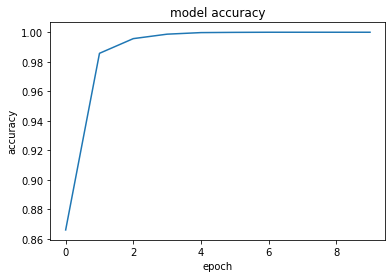

In [58]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

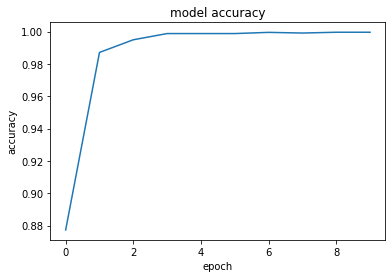

In [59]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')